In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [12]:
src_file_path=os.path.join(os.getcwd(),'sentimentdata/demonetization-tweets.csv')
tweets=pd.read_csv(src_file_path,encoding = "ISO-8859-1")
#tweets.text

In [15]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\chaitraramai
[nltk_data]     ah.TEMENOSGROUP\AppData\Roaming\nltk_data...


True

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

sid = SentimentIntensityAnalyzer()

In [22]:
tweets['sentiment_compound_polarity']=tweets.text.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,801495656976318464,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,0.1027,0.783,0.1,0.117,POSITIVE
1,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,801495654778413057,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
2,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,801495544266821632,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
3,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,801495527024160768,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False,0.0000,1.000,0.0,0.000,NEUTRAL
4,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,801495445583360002,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,0.0000,1.000,0.0,0.000,NEUTRAL


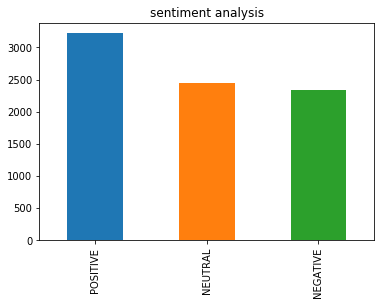

In [21]:
%matplotlib inline
tweets.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")